In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn import linear_model

In [3]:
df = pd.read_csv("./csvs/canada_per_capita_income_gdp.csv")
df.head(5)

,year,per capita income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [4]:
df.columns

Index(['year', 'per capita income'], dtype='object')

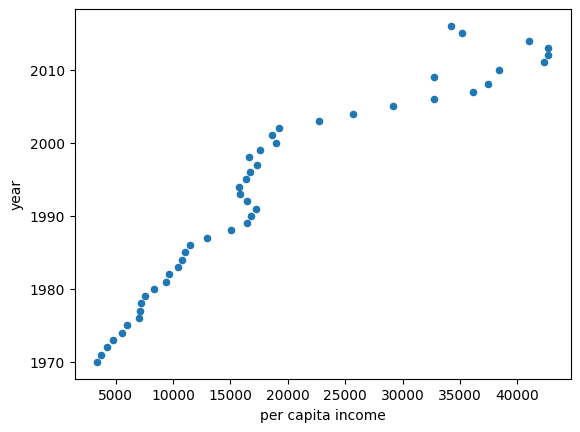

In [5]:
df.plot(x="per capita income" , y="year" , kind="scatter")
plt.show()

In [6]:
reg = linear_model.LinearRegression()
reg.fit(df[["per capita income"]] , df.year)

LinearRegression()

In [7]:
reg.predict([[44400]])

c:\Users\kulde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2020.40060099])

In [8]:
reg.coef_

array([0.00107538])

In [9]:
reg.intercept_

1972.6536140098344

In [10]:
import pickle
with open("objToPredictYearByPerCapitaIncome" , "wb") as f:
    pickle.dump(reg , f)

In [11]:
with open("objToPredictYearByPerCapitaIncome" , "rb") as f:
   mod =  pickle.load(f)

In [13]:
mod.predict([[44400]])

c:\Users\kulde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2020.40060099])

In [28]:
df = pd.read_csv("homeprices.csv")
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [30]:
import math
df.bedrooms = df.bedrooms.fillna(math.floor(df.bedrooms.median()))
df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [31]:
reg = linear_model.LinearRegression()
reg.fit(df[["area" , "bedrooms" , "age" ]] , df.price)

LinearRegression()

In [33]:
print(reg.coef_)
print(reg.intercept_)

[  112.06244194 23388.88007794 -3231.71790863]
221323.00186540437


In [37]:
reg.predict([[3000, 4 , 15]])

c:\Users\kulde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([602590.07937407])

In [38]:
df = pd.read_csv("hiring.csv")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [58]:
df.experience = df.experience.fillna("zero")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [59]:
from word2number import w2n

df.experience = df.experience.apply(w2n.word_to_num)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [70]:
a = ["zero" , "one"]
a = pd.Series(a)
b = a.map(w2n.word_to_num)
b

0    0
1    1
dtype: int64

In [60]:
df["test_score(out of 10)"] = df["test_score(out of 10)"].fillna(df["test_score(out of 10)"].median())
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [61]:
reg = linear_model.LinearRegression()
reg.fit(df[["experience" , "test_score(out of 10)" , "interview_score(out of 10)"]] , df["salary($)"])

LinearRegression()

In [64]:
reg.predict([[2,9,6]])

c:\Users\kulde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671])

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv("./csvs/carprices.csv")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


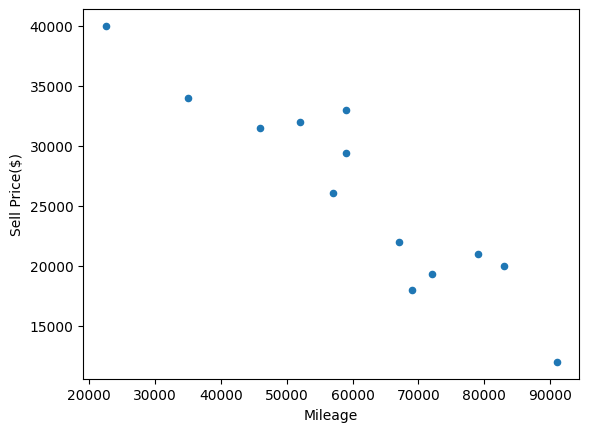

In [3]:
df.plot(kind="scatter" , x="Mileage" , y="Sell Price($)")
plt.show()

In [4]:
df2 = pd.get_dummies(df , columns=["Car Model"])
df2

,Mileage,Sell Price($),Age(yrs),Car Model_Audi A5,Car Model_BMW X5,Car Model_Mercedez Benz C class
0,69000,18000,6,0,1,0
1,35000,34000,3,0,1,0
2,57000,26100,5,0,1,0
3,22500,40000,2,0,1,0
4,46000,31500,4,0,1,0
5,59000,29400,5,1,0,0
6,52000,32000,5,1,0,0
7,72000,19300,6,1,0,0
8,91000,12000,8,1,0,0
9,67000,22000,6,0,0,1


In [5]:
df2 = df2.drop(["Car Model_Mercedez Benz C class"] , axis=1)
df2

,Mileage,Sell Price($),Age(yrs),Car Model_Audi A5,Car Model_BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [15]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(df2[["Mileage" , "Age(yrs)" , "Car Model_Audi A5" ,"Car Model_BMW X5"]] \
    , df2["Sell Price($)"] , train_size=0.2 , random_state=10)

In [16]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train , y_train)

LinearRegression()

In [17]:
reg.predict(X_test)

array([42130.95234659, 19738.09526374, 16571.42858989, 28785.71425186,
       11142.85717979, 26523.80953715, 25619.0476211 , 25619.0476211 ,
       14761.90480089, 36476.19046285, 21095.23812704])

In [18]:
reg.score(X_test ,y_test)

0.7957789715785822